In [699]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats import diagnostic as diag
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')
#Question 1

l1 = 'India'
l2 = 'Dance'

lst1 = list(l1.upper())
lst2 = list(l2.upper())

[c for c in lst1 if c in lst2]

['N', 'D', 'A']

In [700]:
# #Question 2

dict={}
flag = False
while(flag == False):
    keyInput = input('enter the key : ')
    if(int(keyInput) > 0):
        valueInput = input('enter the value :')
        dict[int(keyInput)] = valueInput
    else:
        flag=True
print('Dicitionary is created. Now enter the list of strings to be removed')

lst=[]
flag = False
while(flag == False):
    strInput = input('enter the string to be removed, enter done to stop. :')
    if(strInput != 'done'):
        lst.append(strInput)
    else:
        flag=True

keysToBeRemoved = []     
for inp in lst:
    for item in dict.items():
        print(item)
        if inp in item[1]:
            keysToBeRemoved.append(item[0])
            
print(keysToBeRemoved)

for k in keysToBeRemoved:
    dict.pop(k)

dict


In [701]:
import pandas as pd

df = pd.read_csv('C:/Local/python-training/Test/HollywoodMovies.csv')
df
df = df.dropna()

In [702]:
quest_df = df[(df['Story'] == 'Quest')]
quest_df[(quest_df['RottenTomatoes'] == quest_df['RottenTomatoes'].max())]

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
343,The Hurt Locker,Independent,97.0,83.0,Quest,Drama,4.0,0.14,36338.0,17.01,32.21,49.22,15.0,328.13,0.93,2009
629,The Muppets,Disney,97.0,87.0,Quest,Comedy,3440.0,29.24,8500.0,88.63,76.55,165.18,45.0,367.08,64.98,2011


In [703]:
{(item, df[(df['Genre'] == item)]['Genre'].count()) for item in df['Genre'].unique()}

{('Action', 150),
 ('Adventure', 29),
 ('Animation', 47),
 ('Biography', 13),
 ('Comedy', 154),
 ('Crime', 13),
 ('Documentary', 4),
 ('Drama', 77),
 ('Fantasy', 5),
 ('Horror', 43),
 ('Musical', 3),
 ('Mystery', 5),
 ('Romance', 17),
 ('Thriller', 31)}

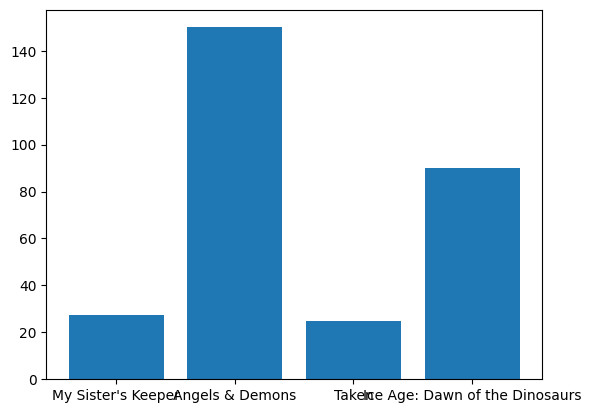

In [704]:
import matplotlib.pyplot as plt
import seaborn as sns

new_df = df.loc[df['Budget'].sort_values(ascending=False).head(5)]
X = new_df['Movie']
Y = new_df['Budget']
plt.bar(X, Y)
plt.show()

In [705]:
df.dtypes

Movie                object
LeadStudio           object
RottenTomatoes      float64
AudienceScore       float64
Story                object
Genre                object
TheatersOpenWeek    float64
OpeningWeekend      float64
BOAvgOpenWeekend    float64
DomesticGross       float64
ForeignGross        float64
WorldGross          float64
Budget              float64
Profitability       float64
OpenProfit          float64
Year                  int64
dtype: object

In [706]:
for col in df.columns:
    if(df[col].dtype == 'object' and col != 'Movie'):
        df[col] = df[col].astype('category')
        df[col] = df[col].astype('category').cat.codes
        df[col] = df[col].astype(int)
df

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
0,Spider-Man 3,25,61.0,54.0,8,0,4252.0,151.10,35540.0,336.53,554.34,890.87,258.0,345.30,58.57,2007
1,Shrek the Third,21,42.0,57.0,11,2,4122.0,121.60,29507.0,322.72,476.24,798.96,160.0,499.35,76.00,2007
2,Transformers,21,57.0,89.0,9,0,4011.0,70.50,17577.0,319.25,390.46,709.71,150.0,473.14,47.00,2007
3,Pirates of the Caribbean: At World's End,5,45.0,74.0,14,0,4362.0,114.70,26302.0,309.42,654.00,963.42,300.0,321.14,38.23,2007
4,Harry Potter and the Order of the Phoenix,32,78.0,82.0,11,1,4285.0,77.10,17998.0,292.00,647.88,939.89,150.0,626.59,51.40,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,What's Your Number,8,24.0,50.0,21,4,3002.0,5.42,1806.0,14.01,16.42,30.43,20.0,152.13,27.10,2011
649,Winnie The Pooh,5,91.0,79.0,11,2,2405.0,7.86,3267.0,26.69,6.46,33.15,30.0,110.51,26.20,2011
650,X-Men: First Class,5,87.0,88.0,9,0,3641.0,55.10,15134.0,146.41,207.22,353.62,160.0,221.01,34.44,2011
651,Your Highness,28,26.0,36.0,0,4,2769.0,9.36,3380.0,21.60,3.26,24.86,49.9,49.81,18.76,2011


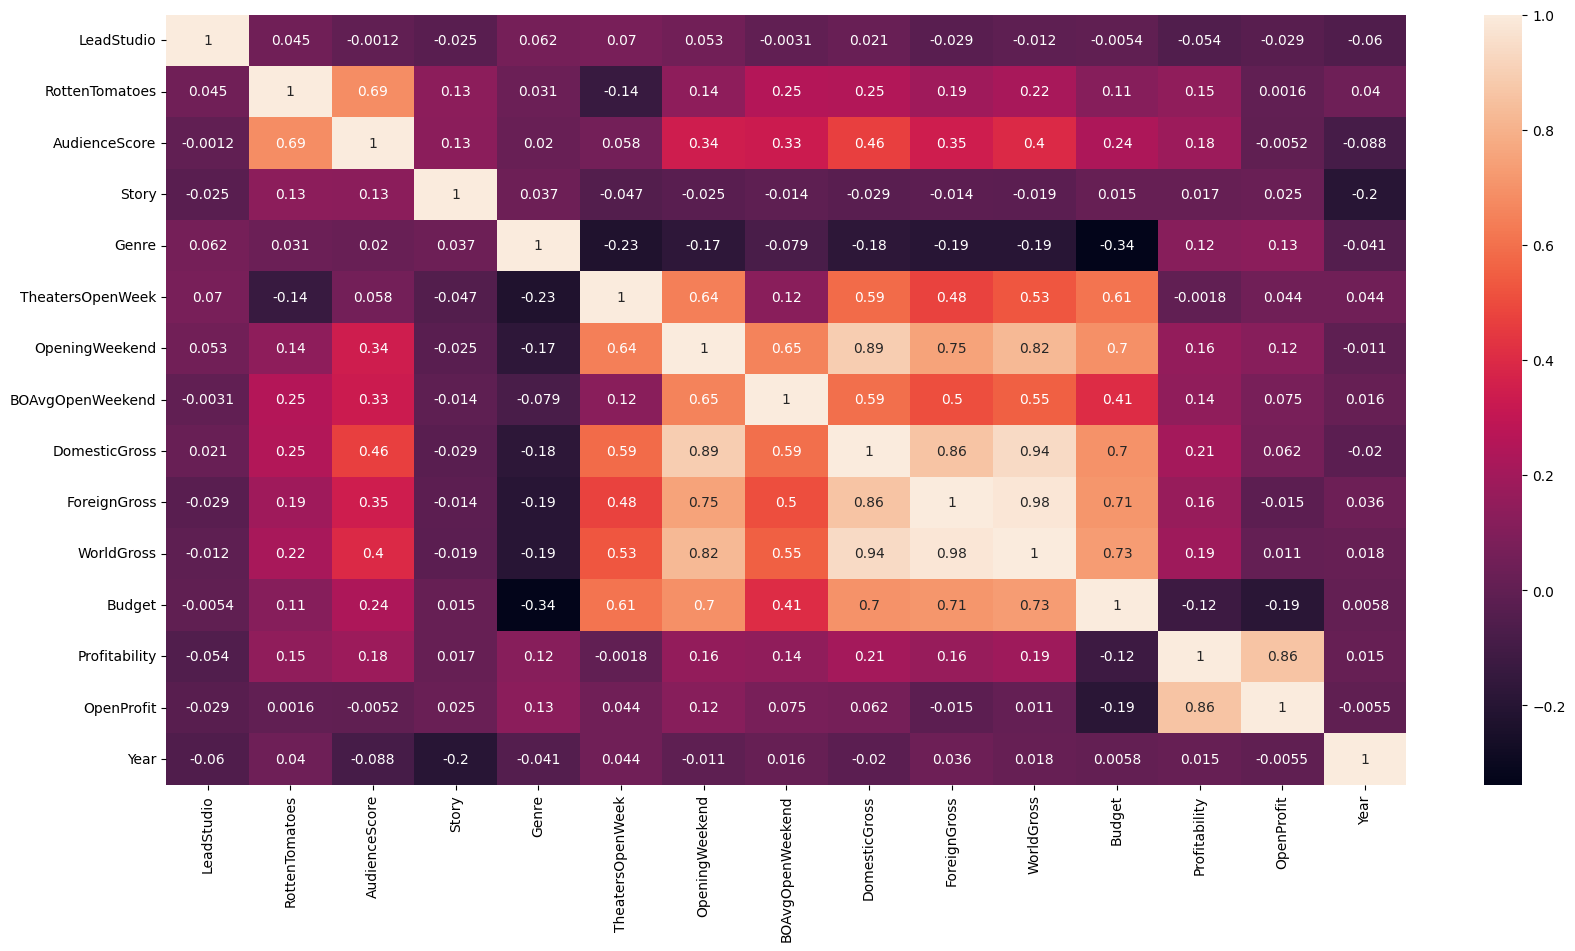

In [707]:
#3.4 Is there any correspondence between the critics’ evaluation of a movie and its acceptance by the public,
#to  find out plot the profitability of a movie against the ratings it receives on Rotten Tomatoes in a form of scatter plot

new_df = df.drop(columns=['Movie'])
new_df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(new_df.corr(), annot=True, cbar=True)
plt.show()

In [708]:
#RottenTomatoes vs Audience ratings correlation = 0.69

<Axes: xlabel='RottenTomatoes', ylabel='Profitability'>

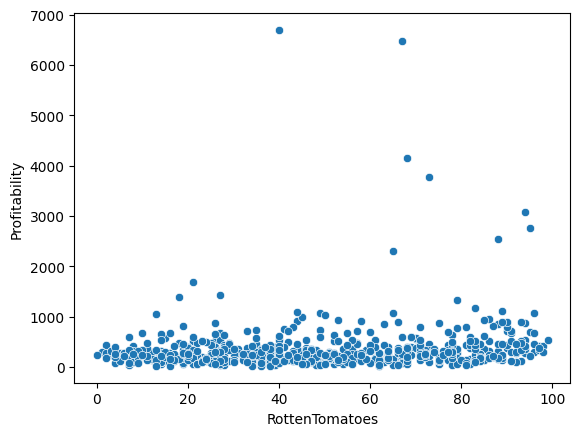

In [709]:
X = df['RottenTomatoes']
Y = df['Profitability']

sns.scatterplot(x=X, y=Y)

In [710]:
#3.5 sort the data based on column RottenTomatoes and pick top 10 rows

new_df = df['RottenTomatoes'].sort_values(ascending=False).head(10)
new_df

499    99.0
419    98.0
243    98.0
343    97.0
629    97.0
10     97.0
95     96.0
501    96.0
490    96.0
555    96.0
Name: RottenTomatoes, dtype: float64

In [711]:
#3.6 find the name of LeadStudio which released maximum number of movies across all the years

In [712]:
#3.7 Find the mean of RottenTomatoes column
df['RottenTomatoes'].mean()

48.978003384094755

In [713]:
#3.8 Create new data frame where RottenTomatoes column has all the values greater than 90
new_df = df[(df['RottenTomatoes'] > 90)]
new_df

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
6,The Bourne Ultimatum,28,93.0,91.0,10,13,3660.0,69.30,18929.0,227.47,215.35,442.820,110.0,402.57,63.00,2007
10,Ratatouille,5,97.0,84.0,21,2,3940.0,47.00,11935.0,206.45,417.28,623.720,150.0,415.81,31.33,2007
13,Knocked Up,28,91.0,83.0,6,4,2871.0,30.70,10690.0,148.77,70.31,219.080,33.0,663.86,93.03,2007
14,Juno,8,94.0,89.0,7,4,1019.0,10.60,10436.0,143.50,87.92,231.410,7.5,3085.48,141.33,2007
19,Enchanted,5,93.0,80.0,6,4,3730.0,34.40,9233.0,127.81,212.68,340.490,85.0,400.57,40.47,2007
23,Hairspray,32,92.0,84.0,22,10,3121.0,27.50,8803.0,118.87,83.68,202.550,75.0,270.06,36.67,2007
34,No Country for Old Men,21,95.0,84.0,10,7,860.0,7.80,9042.0,74.28,97.34,171.630,25.0,686.50,31.20,2007
54,There Will Be Blood,21,91.0,84.0,23,7,885.0,4.90,5502.0,40.22,35.96,76.180,25.0,304.72,19.60,2007
72,Sicko,33,93.0,87.0,33,6,702.0,3.60,5128.0,24.54,11.55,36.090,9.0,400.98,40.00,2007
91,The Dark Knight,32,94.0,96.0,15,13,4366.0,158.40,36283.0,534.86,469.70,1004.560,185.0,543.00,85.62,2008


In [714]:
#3.9 Find the sum of Profitability and Budget columns year wise.

new_df = df.groupby(['Year'])
new_df


In [715]:
bank_df = pd.read_csv('C:/Local/python-training/Test/bank-full.csv')
bank_df

,age,job,marital,educ@&ation,default,balance,housing,loan####,contact,day,month,duration,campaign11112223333,pdays,previous,poutcome,subscribed_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,NO
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [716]:
bank_df.shape

(45211, 17)

In [717]:
bank_df.isna().sum()

age                    0
job                    0
marital                0
educ@&ation            0
default                0
balance                0
housing                0
loan####               0
contact                0
day                    0
month                  0
duration               0
campaign11112223333    0
pdays                  0
previous               0
poutcome               0
subscribed_deposit     0
dtype: int64

In [718]:
#No need
bank_df.dropna(inplace=True, axis=0)
bank_df.shape

(45211, 17)

In [719]:
# removing special chars form the data
# Define a regular expression pattern to match special characters
specialchar_pattern = r'[@$#&_]'
num_pattern = r'[0-9]'

# Remove special characters from column names
bank_df.columns = bank_df.columns.str.replace(specialchar_pattern, '', regex=True)
bank_df.columns = bank_df.columns.str.replace(num_pattern, '', regex=True)
bank_df.columns
bank_df = bank_df[~bank_df.apply(lambda x:x.str.contains(specialchar_pattern).any(), axis=1)]
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribeddeposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,NO
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [720]:
bank_df['subscribeddeposit'].unique()

array(['no', 'NO', 'nO', 'yes'], dtype=object)

In [721]:
bank_df['subscribeddeposit'] = bank_df['subscribeddeposit'].map({'no' : 'NO', 'yes' : 'YES', 'NO': 'NO', 'nO': 'NO'})
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribeddeposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,NO
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,NO
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,NO
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,NO
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,YES
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,YES
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,YES
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,NO


In [722]:
bank_df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [723]:
bank_df['loan'].unique()

array(['no', 'yes', 'NO', 'YES'], dtype=object)

In [724]:
bank_df['loan'] = bank_df['loan'].map({'no' : 'NO', 'yes' : 'YES', 'NO': 'NO', 'YES': 'YES'})
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribeddeposit
0,58,management,married,tertiary,no,2143,yes,NO,unknown,5,may,261,1,-1,0,unknown,NO
1,44,technician,single,secondary,no,29,yes,NO,unknown,5,may,151,1,-1,0,unknown,NO
2,33,entrepreneur,married,secondary,no,2,yes,YES,unknown,5,may,76,1,-1,0,unknown,NO
3,47,blue-collar,married,unknown,no,1506,yes,NO,unknown,5,may,92,1,-1,0,unknown,NO
4,33,unknown,single,unknown,no,1,no,NO,unknown,5,may,198,1,-1,0,unknown,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,NO,cellular,17,nov,977,3,-1,0,unknown,YES
45207,71,retired,divorced,primary,no,1729,no,NO,cellular,17,nov,456,2,-1,0,unknown,YES
45208,72,retired,married,secondary,no,5715,no,NO,cellular,17,nov,1127,5,184,3,success,YES
45209,57,blue-collar,married,secondary,no,668,no,NO,telephone,17,nov,508,4,-1,0,unknown,NO


In [725]:
bank_df['default'].unique()

array(['no', 'yes'], dtype=object)

In [726]:
for col in bank_df.columns:
    if(bank_df[col].dtype == 'object'):
        bank_df[col] = bank_df[col].astype('category')
        bank_df[col] = bank_df[col].astype('category').cat.codes
        bank_df[col] = bank_df[col].astype(int)
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribeddeposit
0,58,4,4,2,0,6359,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,5,1,0,7137,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,4,1,0,6197,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,4,3,0,5577,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,5,3,0,4728,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,4,2,0,1247,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,3,0,0,1974,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,4,1,0,3311,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,4,1,0,1097,0,0,1,17,9,508,4,-1,0,3,0


In [727]:
# if var < 0.1 remove col

vars = bank_df.var()
vars

columns_to_drop = [col for col in bank_df.columns if bank_df[col].var() < 0.1]
print(columns_to_drop)
bank_df = bank_df.drop(columns=columns_to_drop)
bank_df

['default']


,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribeddeposit
0,58,4,4,2,6359,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,5,1,7137,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,4,1,6197,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,4,3,5577,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,5,3,4728,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,4,2,1247,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,3,0,1974,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,4,1,3311,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,4,1,1097,0,0,1,17,9,508,4,-1,0,3,0


In [728]:
means = bank_df.mean()
stddevs = bank_df.std()

# How many sigmas
sd_limit=3

# distance of data from mean
diff = (bank_df-means)

# Find the indices of outliers in each column
outlier_indices = (diff.abs() > sd_limit*stddevs).any(axis=1)

# Filter the DataFrame to get rows with outliers
bank_df = bank_df[~outlier_indices]
bank_df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribeddeposit
0,58,4,4,2,6359,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,5,1,7137,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,4,1,6197,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,4,3,5577,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,5,3,4728,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,9,5,1,936,0,1,0,17,9,386,2,-1,0,3,1
45206,51,9,4,2,1247,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,3,0,1974,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,4,1,3311,0,0,0,17,9,1127,5,184,3,2,1


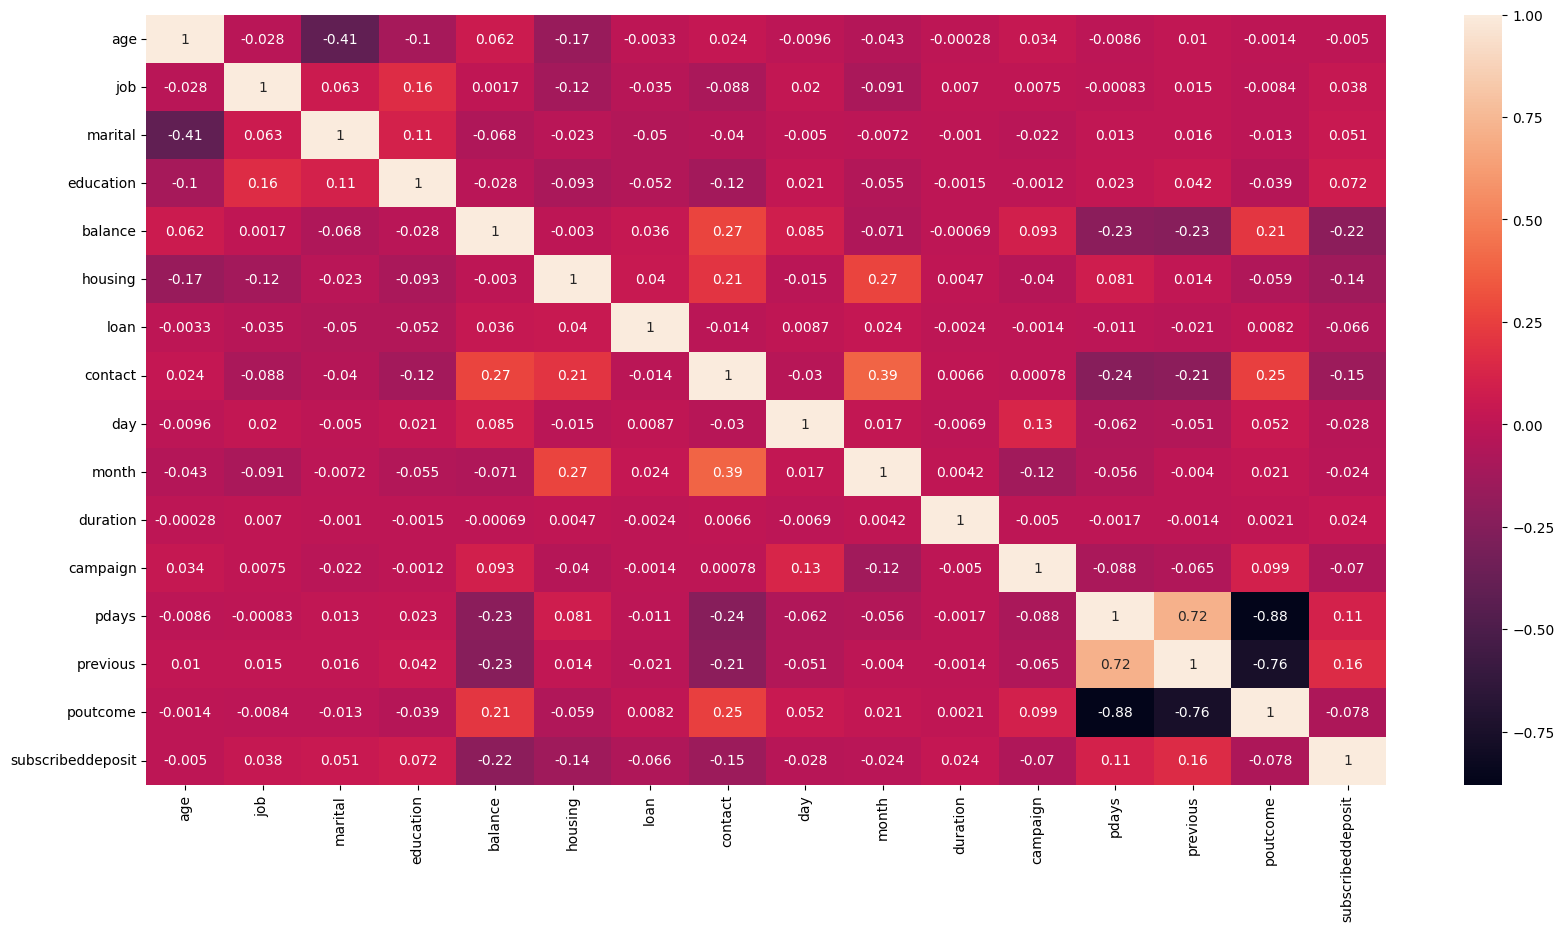

In [729]:
plt.figure(figsize=(20,10))
sns.heatmap(bank_df.corr(), annot = True, cbar = True)
plt.show()

In [730]:
# Need to drop all columns with no relation with high correlation between them
bank_df=bank_df.drop(columns=['poutcome', 'pdays'])

In [731]:
#drop columns with <0.01 correlation with dependent var
bank_df = bank_df.drop(columns=['age'])
bank_df

,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,subscribeddeposit
0,4,4,2,6359,1,0,2,5,8,261,1,0,0
1,9,5,1,7137,1,0,2,5,8,151,1,0,0
2,2,4,1,6197,1,1,2,5,8,76,1,0,0
3,1,4,3,5577,1,0,2,5,8,92,1,0,0
4,11,5,3,4728,0,0,2,5,8,198,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,9,5,1,936,0,1,0,17,9,386,2,0,1
45206,9,4,2,1247,0,0,0,17,9,977,3,0,1
45207,5,3,0,1974,0,0,0,17,9,456,2,0,1
45208,5,4,1,3311,0,0,0,17,9,1127,5,3,1


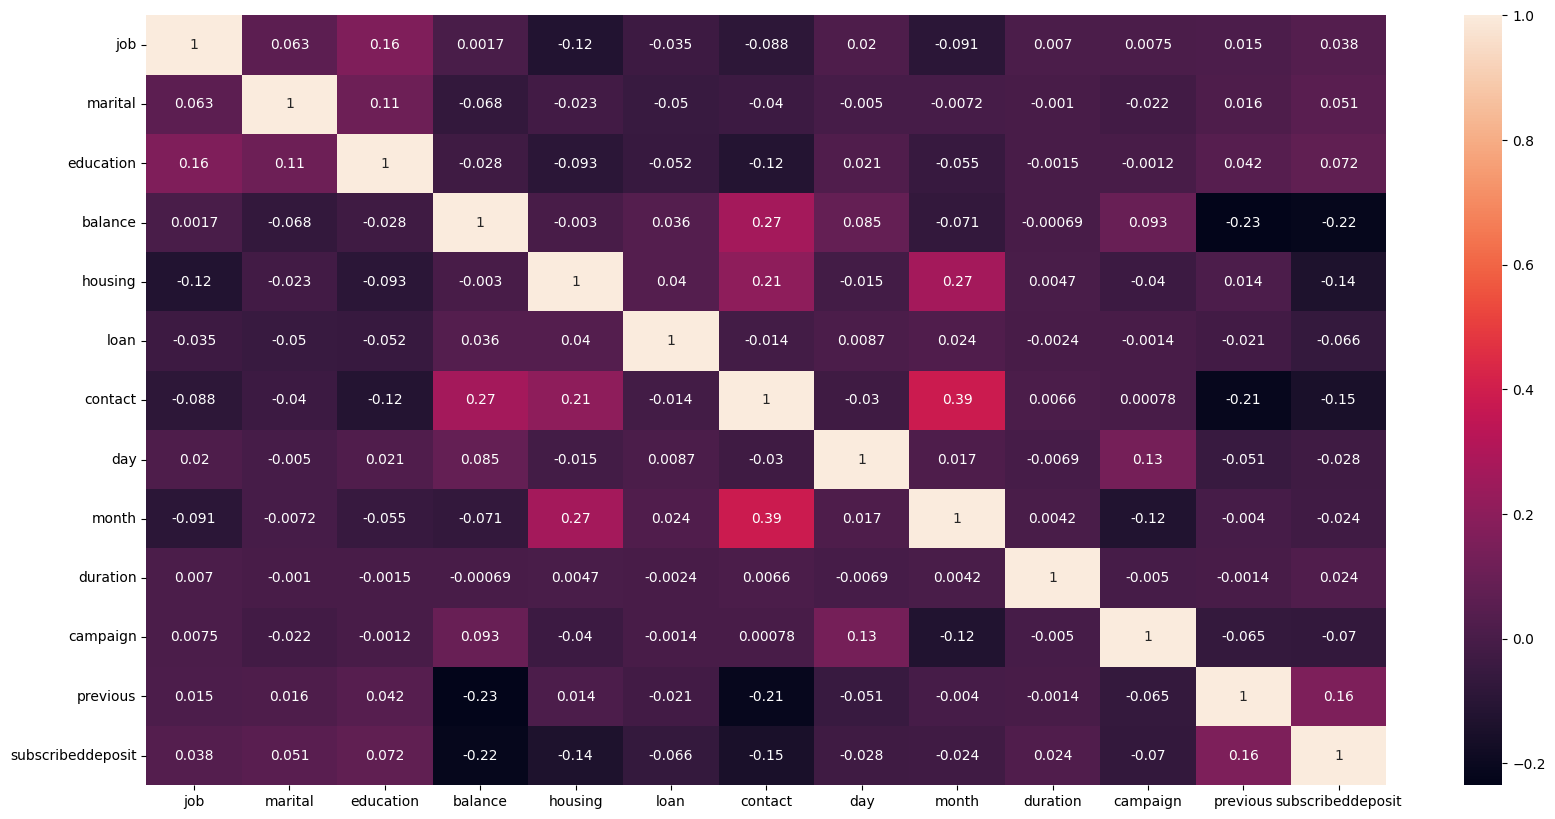

In [732]:
plt.figure(figsize=(20,10))
sns.heatmap(bank_df.corr(), annot = True, cbar = True)
plt.show()

<Axes: xlabel='subscribeddeposit', ylabel='count'>

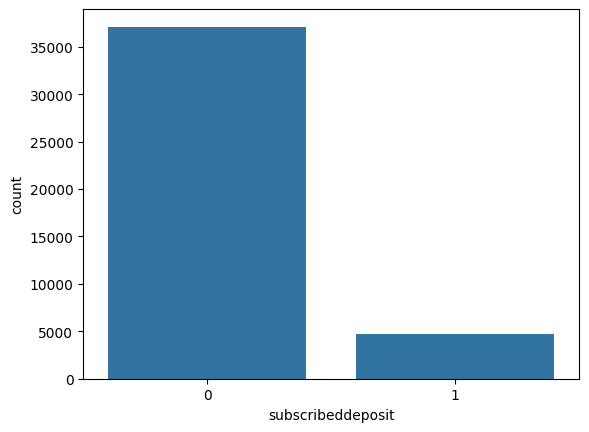

In [733]:
#data cleaned up, run models now
sns.countplot(bank_df, x=bank_df['subscribeddeposit'])

In [734]:
X = bank_df.drop('subscribeddeposit', axis = 1)
Y = bank_df['subscribeddeposit']
# sc = StandardScaler()
# X = sc.fit_transform(X)

In [735]:
train_x, test_x, train_y, test_y = train_test_split(X,Y,random_state=3,test_size=0.3)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(29278, 12)
(12549, 12)
(29278,)
(12549,)


In [736]:
model = LogisticRegression()
model.fit(train_x, train_y)
pv = model.predict(test_x)
print('Accuracy score is : ', accuracy_score(pv, test_y))
print('Confusion Matrix is')
confusion_matrix(pv, test_y)

Accuracy score is :  0.8976810901267033
Confusion Matrix is


array([[10884,  1026],
       [  258,   381]], dtype=int64)

In [737]:
f1_score(pv, test_y)

0.37243401759530786

In [738]:
model_dt = DecisionTreeClassifier()
model_dt.fit(train_x, train_y)
pv = model_dt.predict(test_x)
print('Accuracy score is : ', accuracy_score(pv, test_y))
print('Confusion Matrix is')
confusion_matrix(pv, test_y)

TypeError: got an unexpected keyword argument 'average'

In [ ]:
f1_score(pv, test_y)

0.4929818555289284

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 100)
model_rf.fit(train_x, train_y)
pv = model_rf.predict(test_x)
print("accuracy of the model is ", accuracy_score(test_y, pv, average='micro'))
print("feature importances are ", model_rf.feature_importances_)

accuracy of the model is  0.9074826679416687
feature importances are  [0.05932417 0.02740969 0.03177509 0.20404007 0.0356366  0.01087376
 0.01909703 0.10785793 0.09153523 0.33431703 0.04457471 0.03355868]


In [743]:
f1_score(pv, test_y,average='weighted')

0.8805639640856756